In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Customers dataset

In [ ]:
customers=pd.read_csv('/content/Customers.csv')
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
customers.shape

(200, 4)

In [ ]:
customers.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [ ]:
customers["CustomerID"].nunique()

200



> All the customers are unique and have signed up only once



In [ ]:
customers["Region"].value_counts()

,count
Region,
South America,59
Europe,50
North America,46
Asia,45




> Most customers are from South America Region



**Distribution os SignUps by region**

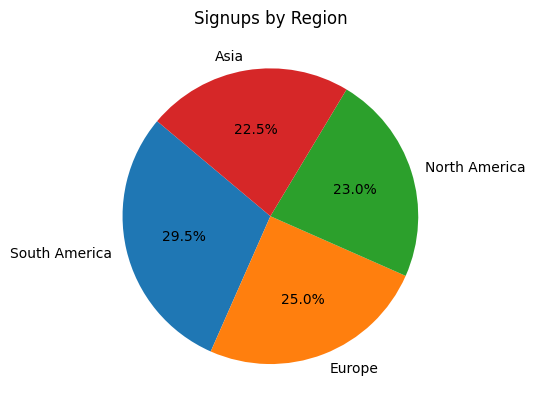

In [ ]:
region_counts = customers["Region"].value_counts()

# Plot a pie chart
region_counts.plot(kind="pie", autopct='%1.1f%%', startangle=140, title="Signups by Region")
plt.ylabel("")  # Remove y-axis label
plt.show()

In [ ]:
customers['SignupDate']=pd.to_datetime(customers['SignupDate'])

In [ ]:
signup_trends_year = customers["SignupDate"].dt.year.value_counts().sort_index()
signup_trends_year

,count
SignupDate,
2022,64
2023,57
2024,79


In [ ]:
signup_trends_month= customers["SignupDate"].dt.month.value_counts().sort_index()
signup_trends_month

,count
SignupDate,
1,15
2,21
3,20
4,24
5,17
6,12
7,13
8,10
9,21


Creating new features- SignupYear,Date, SignupMonth

In [ ]:
df=customers.copy()

In [ ]:
df["SignupMonth"] = customers["SignupDate"].dt.month
df["SignupYear"] = customers["SignupDate"].dt.year
df["Date"] = customers["SignupDate"].dt.day

In [ ]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,SignupMonth,SignupYear,Date
0,C0001,Lawrence Carroll,South America,2022-07-10,7,2022,10
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2,2022,13
2,C0003,Michael Rivera,South America,2024-03-07,3,2024,7
3,C0004,Kathleen Rodriguez,South America,2022-10-09,10,2022,9
4,C0005,Laura Weber,Asia,2022-08-15,8,2022,15


In [ ]:
import matplotlib.pyplot as plt

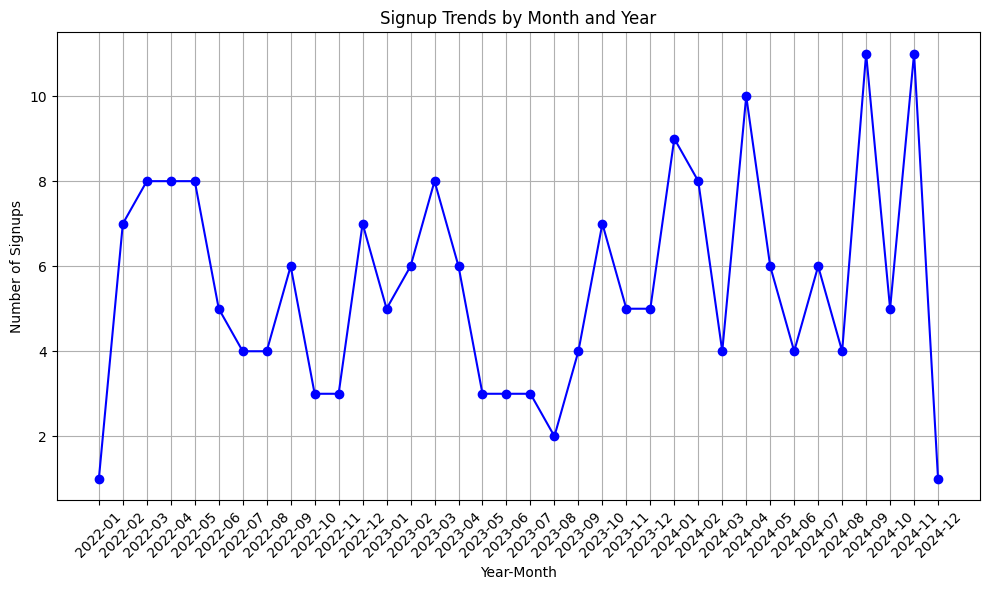

In [ ]:
trend = df.groupby(["SignupYear", "SignupMonth"]).size().reset_index(name="Signups")

trend["YearMonth"] = trend["SignupYear"].astype(str) + "-" + trend["SignupMonth"].astype(str).str.zfill(2)
plt.figure(figsize=(10, 6))
plt.plot(trend["YearMonth"], trend["Signups"], marker='o', color='b')
plt.title('Signup Trends by Month and Year')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

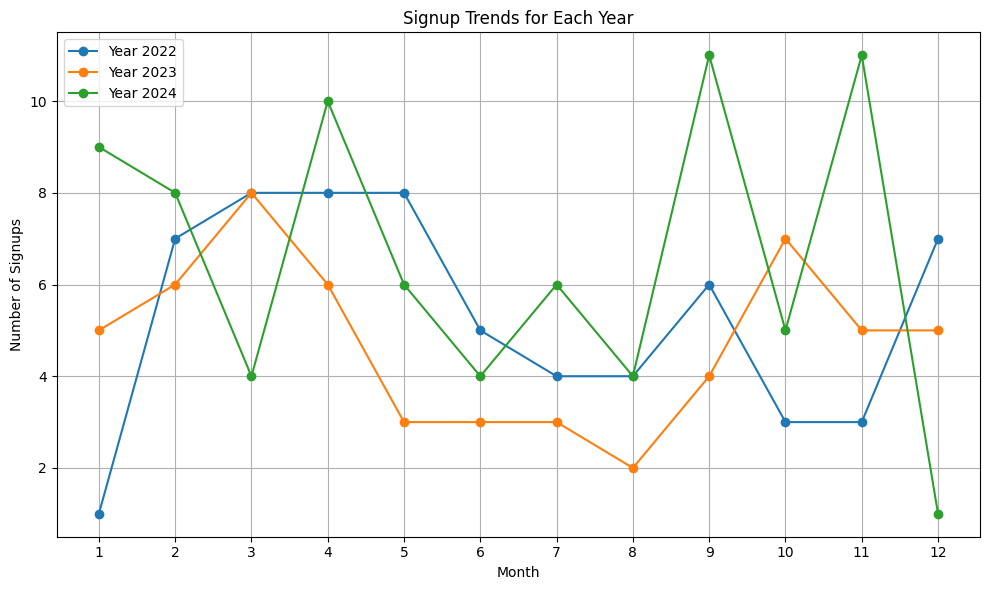

In [ ]:
df["SignupDate"] = pd.to_datetime(df["SignupDate"])

signup_trends = df.groupby(["SignupYear", "SignupMonth"]).size().reset_index(name="Signups")

plt.figure(figsize=(10, 6))
for year in signup_trends["SignupYear"].unique():
    yearly_data = signup_trends[signup_trends["SignupYear"] == year]
    plt.plot(
        yearly_data["SignupMonth"],
        yearly_data["Signups"],
        marker='o',
        label=f"Year {year}"
    )


plt.title("Signup Trends for Each Year")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



> 1.   There is a general increasing trend in signups with year
2.   There is a dramatic decrease in signups from Nov to Dec in 2024 (90.9 %) decrease unlike any other years. The reason might be due to incomplete data of 2024 dec or any other major reason.
3.  Highest signups across all years in a month-11,
Lowest-1
4.  The year 2023 has seen especially low signups from May-Sept which needs further investigation on the reason.
5.  Year 2024 has seen more dramatic spikes in signups but only for a month, this might be due to a new scheme or an offer that only lasts for a month or any other reason.







In [ ]:
df.describe()

,SignupDate,SignupMonth,SignupYear,Date
count,200,200.000000,200.000000,200.000000
mean,2023-07-19 08:31:12,6.225000,2023.075000,14.510000
min,2022-01-22 00:00:00,1.000000,2022.000000,1.000000
25%,2022-09-26 12:00:00,3.000000,2022.000000,7.000000
50%,2023-08-31 12:00:00,6.000000,2023.000000,14.000000
75%,2024-04-12 12:00:00,9.000000,2024.000000,21.000000
max,2024-12-28 00:00:00,12.000000,2024.000000,31.000000
std,NaN,3.486424,0.844358,8.056952


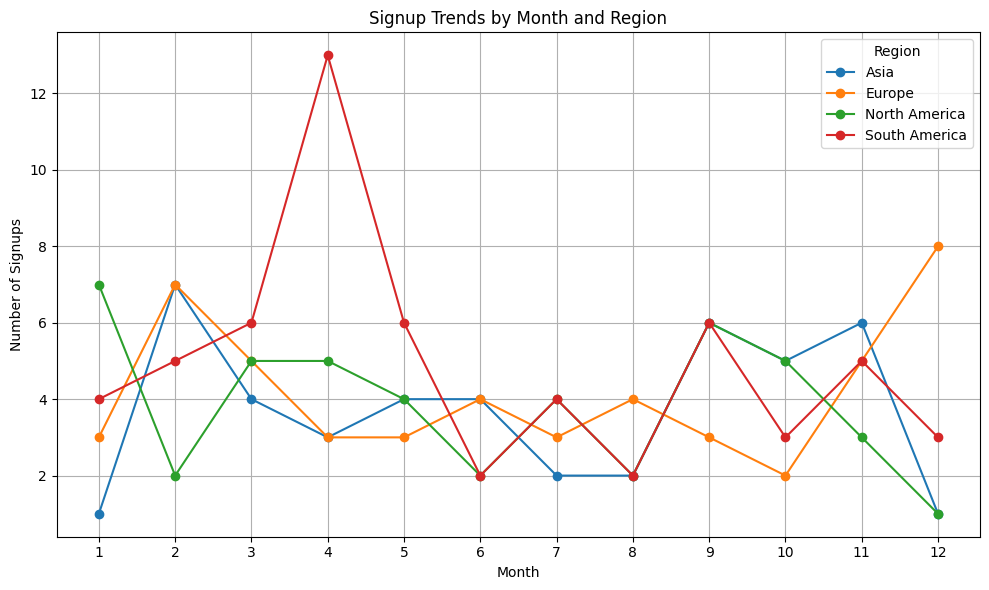

In [ ]:
signup_trends = df.groupby(["SignupMonth", "Region"]).size().reset_index(name="Signups")

pivot_trends = signup_trends.pivot(index="SignupMonth", columns="Region", values="Signups").fillna(0)
plt.figure(figsize=(10, 6))
for region in pivot_trends.columns:
    plt.plot(pivot_trends.index, pivot_trends[region], marker='o', label=region)
plt.title("Signup Trends by Month and Region")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.xticks(range(1, 13))
plt.legend(title="Region")
plt.grid(True)
plt.tight_layout()
plt.show()



> While signups havent crossed 8 in any month, there is a dramatic spike in SouthAmerica region from march to april followed by a dramatic drop following april. This trend needs to be investigated as it might connect to anything specific to that region.



**Investigating further for every year**

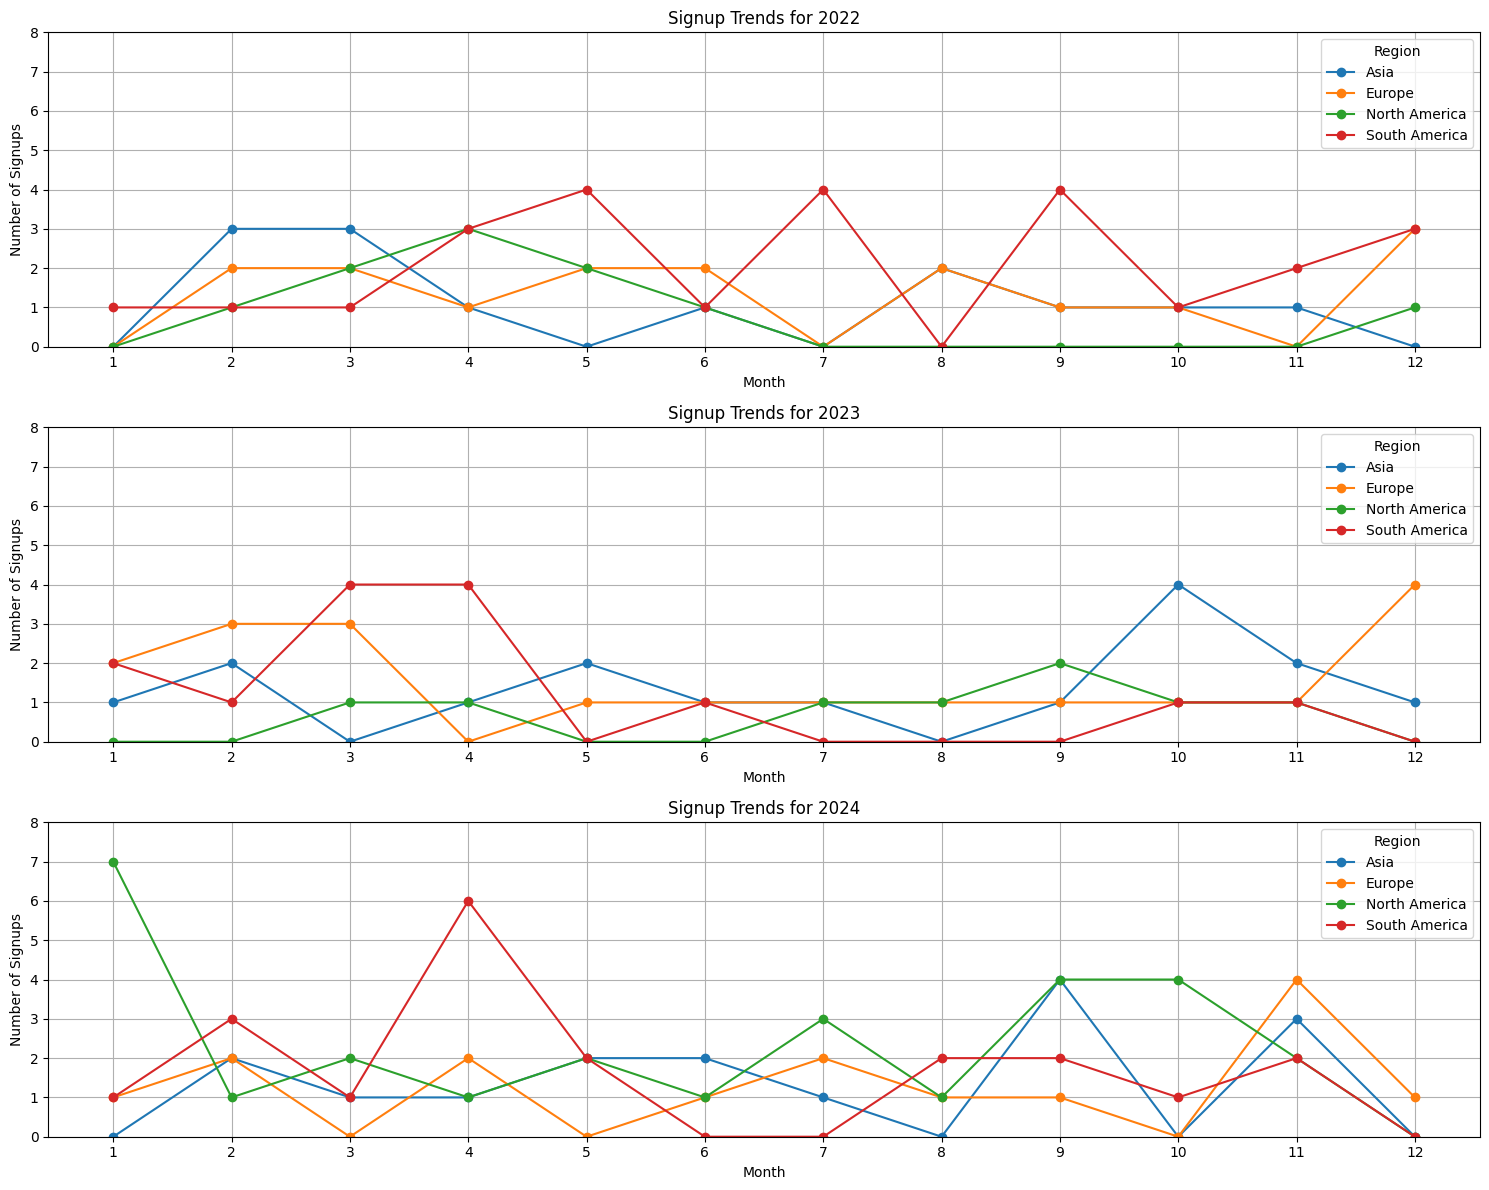

In [ ]:
years = df["SignupYear"].unique()
max_signups = (
    df.groupby(["SignupMonth", "Region", "SignupYear"])
    .size()
    .max()
)

plt.figure(figsize=(15, 12))
for i, year in enumerate(sorted(years), start=1):

    year_data = df[df["SignupYear"] == year]
    signup_trends = year_data.groupby(["SignupMonth", "Region"]).size().reset_index(name="Signups")
    pivot_trends = signup_trends.pivot(index="SignupMonth", columns="Region", values="Signups").fillna(0)
    plt.subplot(len(years), 1, i)
    for region in pivot_trends.columns:
        plt.plot(pivot_trends.index, pivot_trends[region], marker='o', label=region)


    plt.title(f"Signup Trends for {year}")
    plt.xlabel("Month")
    plt.ylabel("Number of Signups")
    plt.xticks(range(1, 13))
    plt.ylim(0, max_signups + 1)
    plt.legend(title="Region")
    plt.grid(True)

plt.tight_layout()
plt.show()







> Signups are generally high during March-April in South America



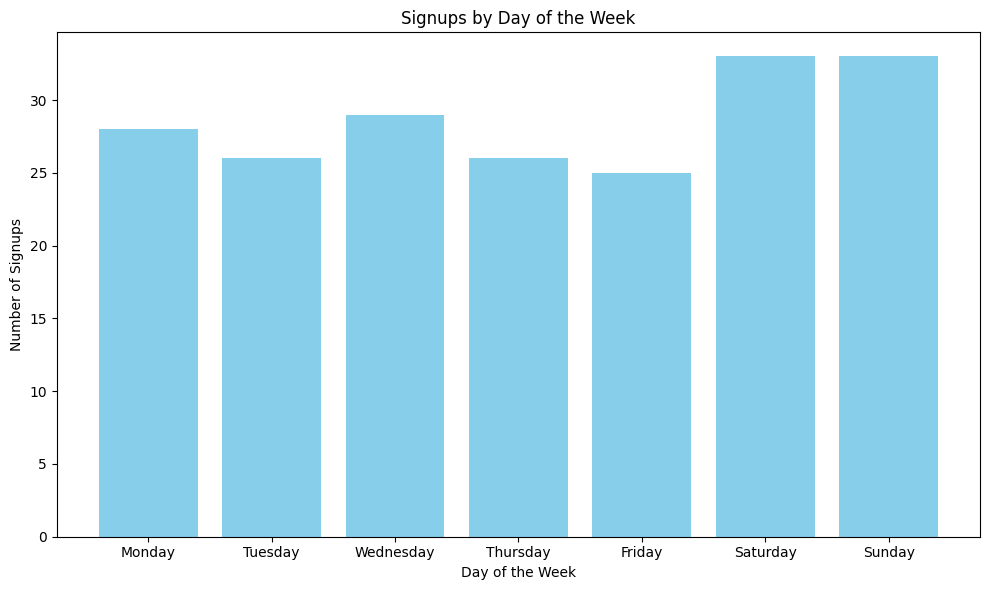

In [ ]:
df["DayOfWeek"] = df["SignupDate"].dt.day_name()

day_of_week_signups = df.groupby("DayOfWeek").size().reset_index(name="Signups")

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_signups["DayOfWeek"] = pd.Categorical(day_of_week_signups["DayOfWeek"], categories=day_order, ordered=True)
day_of_week_signups = day_of_week_signups.sort_values("DayOfWeek")

plt.figure(figsize=(10, 6))
plt.bar(day_of_week_signups["DayOfWeek"], day_of_week_signups["Signups"], color="skyblue")
plt.title("Signups by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Signups")
plt.tight_layout()
plt.show()


> Signups are higher on weekends than on weekdays






---



## 2. Products Dataset

In [ ]:
products=pd.read_csv('/content/Products.csv')
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [ ]:
products.shape

(100, 4)

In [ ]:
products.isnull().sum().sum()

0

In [ ]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [ ]:
products.loc[products['Price']==16.080000]

,ProductID,ProductName,Category,Price
55,P056,SoundWave Smartwatch,Electronics,16.08


In [ ]:
products.loc[products['Price']==497.760000]

,ProductID,ProductName,Category,Price
74,P075,TechPro Textbook,Books,497.76




> The lowest priced product is a Smartwatch priced at 16$ which is highly unlikely and needs to be rechecked.





> The price range of products is 16-498 USD
and average price is 267 USD



In [ ]:
products['Category'].value_counts()

,count
Category,
Books,26
Electronics,26
Clothing,25
Home Decor,23




> Roughly all the categories have the same number of products.



**In order to do more analysis on sales, revenue etc, we need to look at the transactions data.**

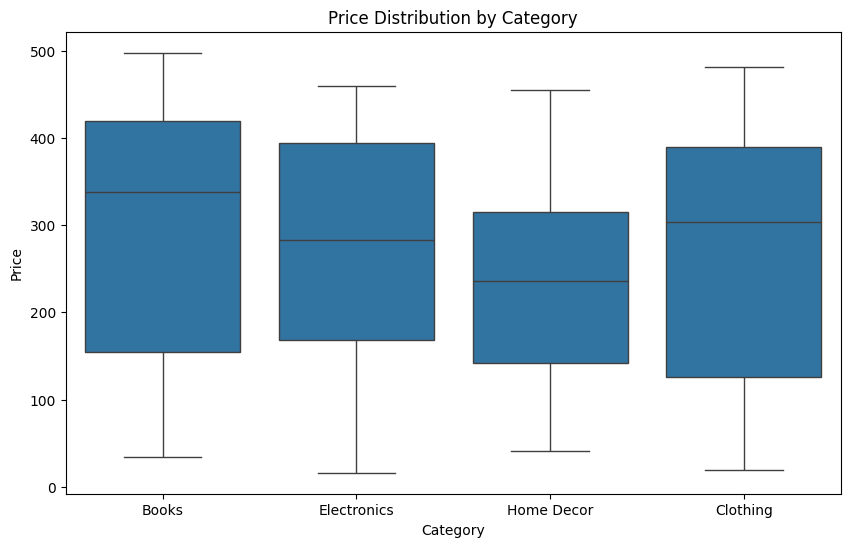

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=products)
plt.title('Price Distribution by Category')
plt.show()

In [ ]:
products.groupby('Category')['Price'].describe()


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Books,26.0,292.212308,153.800135,33.59,154.2975,337.94,419.2125,497.76
Clothing,25.0,263.720000,157.965038,18.82,126.3400,303.50,389.2000,481.78
Electronics,26.0,275.353462,137.056612,16.08,168.8000,282.72,394.3650,459.86
Home Decor,23.0,235.020000,122.236552,41.18,142.3800,235.58,314.9750,454.53




> 1.  There are no outliers in any product category
2.  An unusual trend seen here is that books are generally at higher prices than the electronics which might indicate that the customer keeps high-end books or mid -low range electronic items or there might be some wrong entires in electronics.










**Top 5 products of each category**

In [ ]:
top_5_priced = products.groupby('Category').apply(lambda x: x.nlargest(5, 'Price')).reset_index(drop=True)

print(top_5_priced[['Category', 'ProductName', 'Price']])

       Category               ProductName   Price
0         Books          TechPro Textbook  497.76
1         Books        BookWorld Cookbook  488.63
2         Books       ActiveWear Textbook  469.77
3         Books             TechPro Novel  447.23
4         Books           SoundWave Novel  440.70
5      Clothing         SoundWave T-Shirt  481.78
6      Clothing   HomeSense Running Shoes  452.42
7      Clothing           TechPro T-Shirt  429.31
8      Clothing          ActiveWear Jeans  429.29
9      Clothing         BookWorld Sweater  427.61
10  Electronics      SoundWave Smartwatch  459.86
11  Electronics  ComfortLiving Smartphone  456.28
12  Electronics     ActiveWear Smartwatch  455.72
13  Electronics     ActiveWear Smartwatch  437.65
14  Electronics        TechPro Headphones  433.64
15   Home Decor   ActiveWear Cookware Set  454.53
16   Home Decor    HomeSense Cookware Set  447.34
17   Home Decor            ActiveWear Rug  417.37
18   Home Decor       ActiveWear Wall Art  337.91


<ipython-input-31-6ad04407a47d>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_priced = products.groupby('Category').apply(lambda x: x.nlargest(5, 'Price')).reset_index(drop=True)


**Making 2 new separate columns and copying 'products' in 'df1' to separate product name from its brand**

In [ ]:
df1=products.copy()

In [ ]:
df1['brand'] = products['ProductName'].str.split(' ', n=1).str[0]
df1[['ProductName', 'brand']].head()

,ProductName,brand
0,ActiveWear Biography,ActiveWear
1,ActiveWear Smartwatch,ActiveWear
2,ComfortLiving Biography,ComfortLiving
3,BookWorld Rug,BookWorld
4,TechPro T-Shirt,TechPro


In [ ]:
df1['brand'] = products['ProductName'].str.split(' ', n=1).str[0]
df1['Product'] = products['ProductName'].str.split(' ', n=1).str[1]

df1.head()

,ProductID,ProductName,Category,Price,brand,Product
0,P001,ActiveWear Biography,Books,169.30,ActiveWear,Biography
1,P002,ActiveWear Smartwatch,Electronics,346.30,ActiveWear,Smartwatch
2,P003,ComfortLiving Biography,Books,44.12,ComfortLiving,Biography
3,P004,BookWorld Rug,Home Decor,95.69,BookWorld,Rug
4,P005,TechPro T-Shirt,Clothing,429.31,TechPro,T-Shirt


In [ ]:
df1['brand'].value_counts()

,count
brand,
ActiveWear,23
SoundWave,22
HomeSense,15
BookWorld,14
TechPro,14
ComfortLiving,12




>1.  There are total 6 brands the company sells products of out of which ActiveWear(23 products) has the highest products and ComfortLiving(12) lowest
2. Also, a brand called **'ActiveWear' selling Biography** or a brand called **'BookWorld' selling Rug** seems odd.This indicates that the data might be hypothetical. This argument can be supported by the absence of outliers and overall simplicity of dataset.




## 3. Combining Customers and Products dataset with Transactions dataset

In [ ]:
transactions=pd.read_csv('/content/Transactions.csv')
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
transactions_with_customer = pd.merge(transactions, customers, on='CustomerID', how='inner')
df_merged = pd.merge(transactions_with_customer, products, on='ProductID', how='inner')
df_merged.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
df_merged.shape

(1000, 13)

**Dropping unnecessary or repeated features**

In [ ]:
df_merged=df_merged.drop(columns=['Price_y','CustomerName'])

In [ ]:
df_merged['TransactionID'].nunique()

1000

In [ ]:
df_merged['CustomerID'].nunique()

199

In [ ]:
customers['CustomerID'].nunique()

200



> Since there are 199 unique values fo customers in Transcation dataset and 200 unique values in customer dataset, it shows that there is **only 1 customer** that did not make transaction



In [ ]:

customers_unique = customers['CustomerID'].unique()
df_merged_unique = df_merged['CustomerID'].unique()
customers_set = set(customers_unique)
df_merged_set = set(df_merged_unique)
missing_customers = customers_set - df_merged_set

one_missing_customer = next(iter(missing_customers), None)

print(f"A customer present in 'customers' but not in 'df_merged' is: {one_missing_customer}")


A customer present in 'customers' but not in 'df_merged' is: C0180


Details of that customer:-

In [ ]:
customers[customers['CustomerID']=='C0180']

,CustomerID,CustomerName,Region,SignupDate
179,C0180,Amy Carpenter,Asia,2023-10-25


In [ ]:
df_merged['ProductID'].nunique()

100



> Every product has been purchased **at least once** because of 100 unique values of ProductID



**Making a new column for days it took for the customer to make the first transaction from the signup date**

In [ ]:
df_merged['TransactionDateTime'] = pd.to_datetime(df_merged['TransactionDate'])

df_merged['TransactionDate'] = df_merged['TransactionDateTime'].dt.date

In [ ]:
df_merged['SignupDate'] = pd.to_datetime(df_merged['SignupDate'])
df_merged['TransactionDateTime'] = pd.to_datetime(df_merged['TransactionDateTime'])

df_merged['DaysBetween'] = (df_merged['TransactionDateTime'] - df_merged['SignupDate']).dt.days
df_merged.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Region,SignupDate,ProductName,Category,TransactionDateTime,DaysBetween
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,2024-08-25 12:38:23,631
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,2024-05-27 22:23:54,-100
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,2024-04-25 07:38:55,21
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,2024-03-26 22:55:37,-16
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,2024-03-21 15:10:10,737


Note - negative sign indicated that the transaction occured before customer signup

In [ ]:
print(df_merged['Region'].value_counts())
print(df_merged['Category'].value_counts())
print(df_merged['ProductName'].value_counts())

Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64
ProductName
ActiveWear Smartwatch          40
SoundWave Headphones           38
BookWorld Biography            30
ActiveWear Rug                 29
SoundWave Cookbook             29
                               ..
HomeSense Bluetooth Speaker     7
BookWorld Wall Art              7
SoundWave Laptop                7
SoundWave Bluetooth Speaker     7
SoundWave Jacket                5
Name: count, Length: 66, dtype: int64




> 1. The highest number of transactions occur from South America region
2. the company really seems to focus on books or might have started off as a book seller because the books sales are highest among other prominent categories like Electronics and clothing



**Making separate columns for Brand and Product name**

In [ ]:
df_merged[['Brand', 'ProductName']] = df_merged['ProductName'].str.split(' ',n=1, expand=True)


In [ ]:
df_merged.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Region,SignupDate,ProductName,Category,TransactionDateTime,DaysBetween,Brand
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Europe,2022-12-03,Bluetooth Speaker,Electronics,2024-08-25 12:38:23,631,ComfortLiving
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Asia,2024-09-04,Bluetooth Speaker,Electronics,2024-05-27 22:23:54,-100,ComfortLiving
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Europe,2024-04-04,Bluetooth Speaker,Electronics,2024-04-25 07:38:55,21,ComfortLiving
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,South America,2024-04-11,Bluetooth Speaker,Electronics,2024-03-26 22:55:37,-16,ComfortLiving
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,Europe,2022-03-15,Bluetooth Speaker,Electronics,2024-03-21 15:10:10,737,ComfortLiving


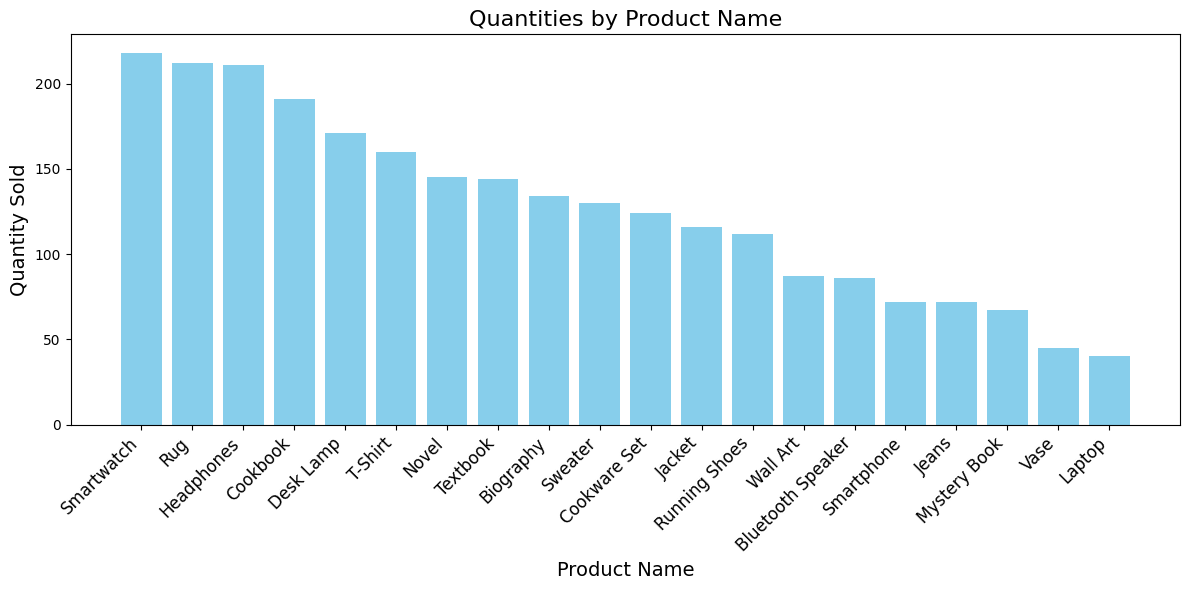

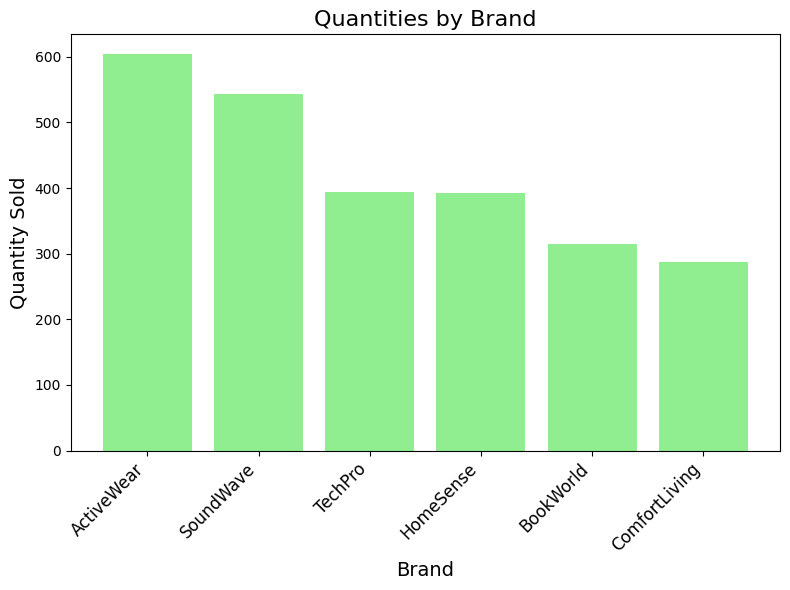

In [ ]:
product_quantity = df_merged.groupby('ProductName')['Quantity'].sum().reset_index()
product_quantity = product_quantity.sort_values(by='Quantity', ascending=False)

brand_quantity = df_merged.groupby('Brand')['Quantity'].sum().reset_index()
brand_quantity = brand_quantity.sort_values(by='Quantity', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(product_quantity['ProductName'], product_quantity['Quantity'], color='skyblue')
plt.title('Quantities by Product Name', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(brand_quantity['Brand'], brand_quantity['Quantity'], color='lightgreen')
plt.title('Quantities by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


> Top 3 products(sales>200):- Smartwatch,Rug, Headphone  
 Top 2 Brands(sales>500):- ActiveWear, SoundWave




**Creatinf a new dataframe to store Total revenue and sales for every month, for every region**

In [ ]:
df_merged['TransactionDate'] = pd.to_datetime(df_merged['TransactionDate'], errors='coerce')

print(df_merged['TransactionDate'])

df_merged['YearMonth'] = df_merged['TransactionDate'].dt.to_period('M')

monthly_revenue_sales = df_merged.groupby(['YearMonth', 'Region', 'Brand']).agg(
    TotalRevenue=('TotalValue', 'sum'),
    TotalSales=('Quantity', 'sum')
).reset_index()

0     2024-08-25
1     2024-05-27
2     2024-04-25
3     2024-03-26
4     2024-03-21
         ...    
995   2024-10-24
996   2024-06-04
997   2024-04-05
998   2024-09-29
999   2024-04-21
Name: TransactionDate, Length: 1000, dtype: datetime64[ns]


In [ ]:

earliest_transaction_date = df_merged['TransactionDate'].min()

earliest_signup_date = df_merged['SignupDate'].min()
print("Earliest Transaction Date:", earliest_transaction_date)
print("Earliest Signup Date:", earliest_signup_date)

Earliest Transaction Date: 2023-12-30 00:00:00
Earliest Signup Date: 2022-01-22 00:00:00




> 1. The first signup occurred on 22 Jan, 2022
2. The first transcation occured on 30 December, 2023

There was a gap of 2 years before the transactions started and after the first customer signup, it could suggest that the platform was still in testing phase or time taken to build customer awareness.



In [ ]:
monthly_revenue_sales.head()

,YearMonth,Region,Brand,TotalRevenue,TotalSales
0,2023-12,Asia,ActiveWear,1585.36,4
1,2023-12,Europe,ActiveWear,958.80,4
2,2023-12,Europe,HomeSense,313.92,2
3,2023-12,North America,ActiveWear,911.44,2
4,2024-01,Asia,ActiveWear,5097.45,14


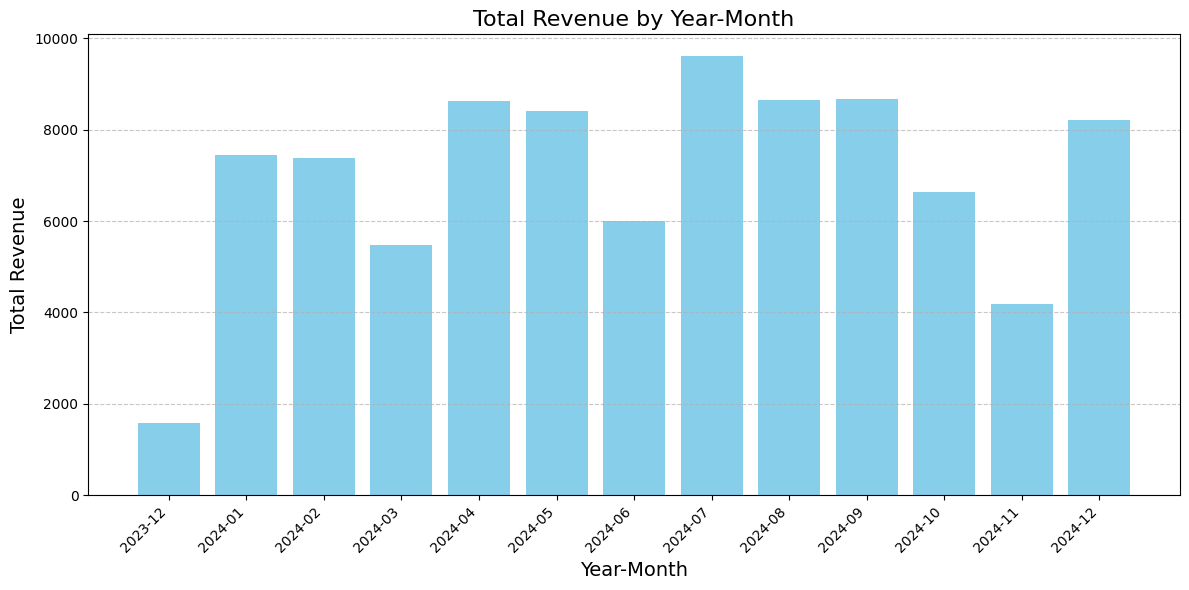

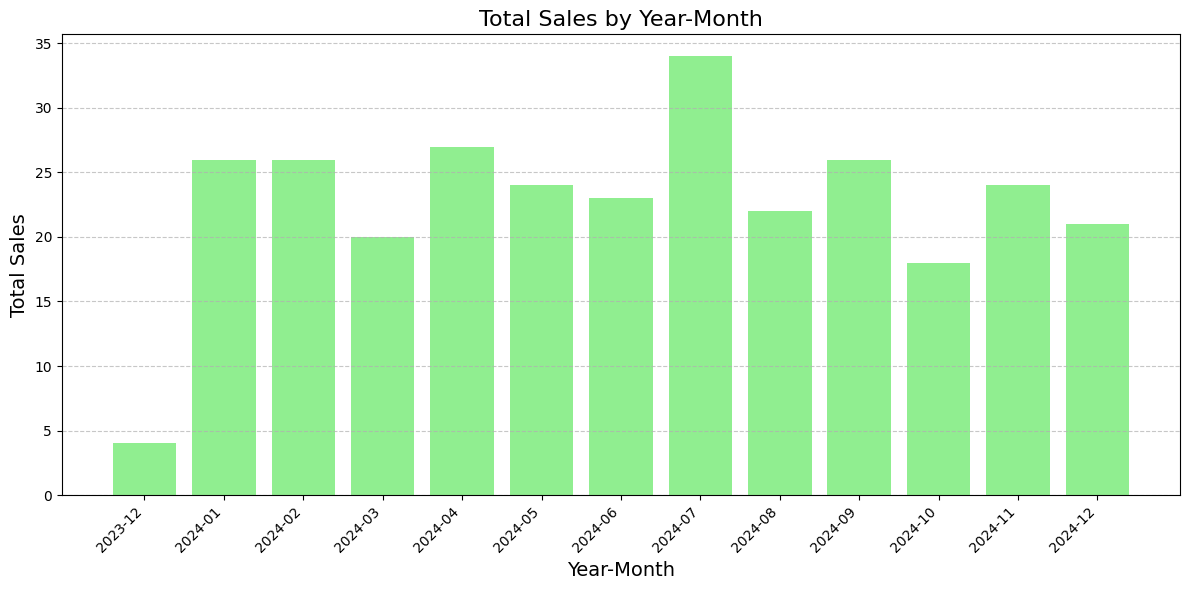

In [ ]:
import matplotlib.pyplot as plt

monthly_revenue_sales['YearMonth'] = monthly_revenue_sales['YearMonth'].astype(str)

plt.figure(figsize=(12, 6))
plt.bar(monthly_revenue_sales['YearMonth'], monthly_revenue_sales['TotalRevenue'], color='skyblue')
plt.title('Total Revenue by Year-Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(monthly_revenue_sales['YearMonth'], monthly_revenue_sales['TotalSales'], color='lightgreen')
plt.title('Total Sales by Year-Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





> 1. The transactions are from Dec 2023 to Dec 2024
2. Both the sales and revenue is highest in the month of July, 2024, indicating some intrinsic reason
3. Sales and revenue are very less for Dec-2023 indicating lack of data for the month



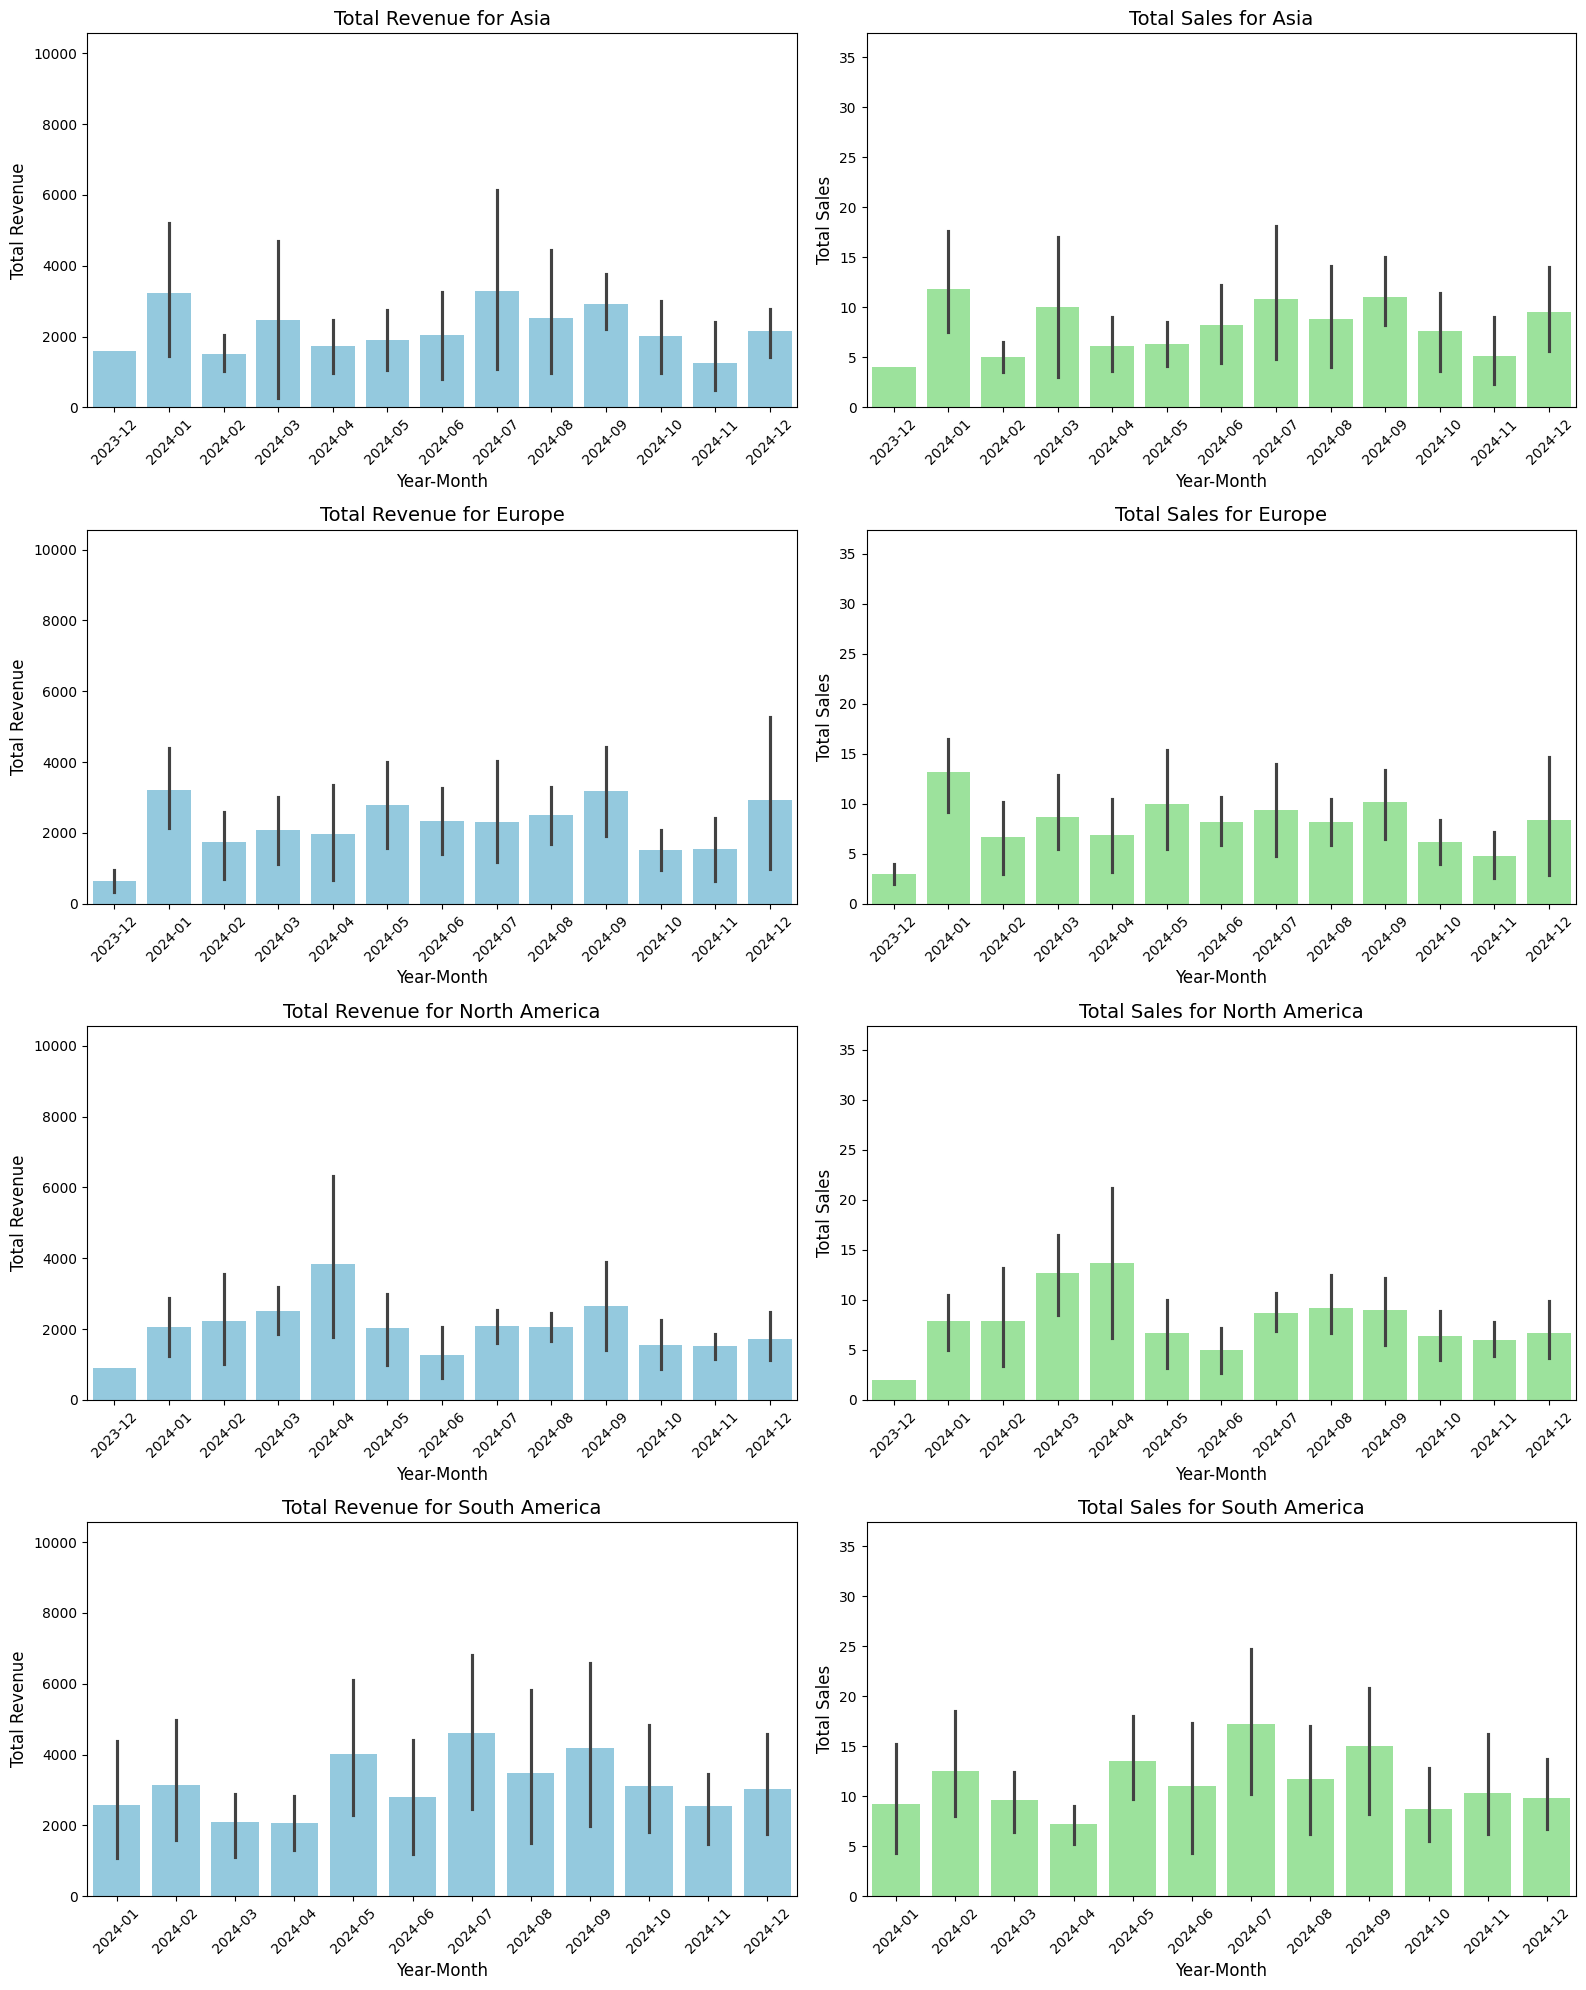

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_revenue_sales['YearMonth'] = monthly_revenue_sales['YearMonth'].astype(str)

regions = monthly_revenue_sales['Region'].unique()

max_revenue = monthly_revenue_sales['TotalRevenue'].max()
max_sales = monthly_revenue_sales['TotalSales'].max()

fig, axes = plt.subplots(len(regions), 2, figsize=(16, 5 * len(regions)), sharex=False)

for i, region in enumerate(regions):

    region_data = monthly_revenue_sales[monthly_revenue_sales['Region'] == region]


    sns.barplot(
        ax=axes[i, 0],
        data=region_data,
        x='YearMonth',
        y='TotalRevenue',
        color='skyblue',
    )
    axes[i, 0].set_title(f'Total Revenue for {region}', fontsize=14)
    axes[i, 0].set_xlabel('Year-Month', fontsize=12)
    axes[i, 0].set_ylabel('Total Revenue', fontsize=12)
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].set_ylim(0, max_revenue + 0.1 * max_revenue)


    sns.barplot(
        ax=axes[i, 1],
        data=region_data,
        x='YearMonth',
        y='TotalSales',
        color='lightgreen',
    )
    axes[i, 1].set_title(f'Total Sales for {region}', fontsize=14)
    axes[i, 1].set_xlabel('Year-Month', fontsize=12)
    axes[i, 1].set_ylabel('Total Sales', fontsize=12)
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].set_ylim(0, max_sales + 0.1 * max_sales)


plt.tight_layout()
plt.show()




> 1. Total sales and total revenue for every month are between 5-15 and 2000-4000 respectively except for South America Region
2. There is no general trend of sales or revenue across regions, this also because there is only 1 year of data




**Finding out customers who have purchase in bulk (Considering a purchase of more than 5 items as bulk)**

In [ ]:

bulk_threshold = 5

bulk_purchases = df_merged[df_merged['Quantity'] > bulk_threshold]

bulk_purchase_counts = bulk_purchases.groupby('CustomerID').size().reset_index(name='BulkPurchaseCount')

repeated_bulk_customers = bulk_purchase_counts[bulk_purchase_counts['BulkPurchaseCount'] > 1]

print("Customers with repeated bulk purchases:")
print(repeated_bulk_customers)
print(bulk_purchase_counts)

Customers with repeated bulk purchases:
Empty DataFrame
Columns: [CustomerID, BulkPurchaseCount]
Index: []
Empty DataFrame
Columns: [CustomerID, BulkPurchaseCount]
Index: []




> None of the customers are bulk purchasers, the maximum quantity of products bought at a time is 3.



**Listing the most frequent customers**

In [ ]:

customer_transaction_counts = df_merged.groupby('CustomerID').size().reset_index(name='TransactionCount')

most_frequent_customers = customer_transaction_counts.sort_values(by='TransactionCount', ascending=False)

most_frequent_customers[most_frequent_customers['TransactionCount']>8]


,CustomerID,TransactionCount
155,C0156,11
108,C0109,11
174,C0175,10
140,C0141,10
64,C0065,10
7,C0008,10
83,C0084,9
74,C0075,9
164,C0165,9
146,C0147,9


In [ ]:
top_customer_ids = [
    'C0156', 'C0109', 'C0175', 'C0141', 'C0065', 'C0008',
    'C0084', 'C0075', 'C0165', 'C0147', 'C0093'
]

top_customers_info = df_merged[df_merged['CustomerID'].isin(top_customer_ids)][['CustomerID', 'Region', 'SignupDate']].drop_duplicates()
print(top_customers_info)

    CustomerID         Region SignupDate
7        C0008  North America 2024-01-13
11       C0075         Europe 2023-05-01
15       C0109  North America 2022-05-09
40       C0065  North America 2024-07-10
103      C0141         Europe 2023-02-23
105      C0156  North America 2023-08-19
110      C0147  South America 2022-05-16
131      C0093           Asia 2024-07-13
138      C0165  South America 2022-04-09
258      C0175           Asia 2022-04-16
324      C0084           Asia 2024-09-17




>1. Top 6 most frequent customers made more than 9 purchases
2. Out of Top 10 most frequent customers, 6 are from America only(North+ South)
3. The company seems to have a strong presence in America as seen from all the insights till now which might indicate, that company originated in America.





In [ ]:
df_merged.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Region,SignupDate,ProductName,Category,TransactionDateTime,DaysBetween,Brand,YearMonth
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Europe,2022-12-03,Bluetooth Speaker,Electronics,2024-08-25 12:38:23,631,ComfortLiving,2024-08
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Asia,2024-09-04,Bluetooth Speaker,Electronics,2024-05-27 22:23:54,-100,ComfortLiving,2024-05
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Europe,2024-04-04,Bluetooth Speaker,Electronics,2024-04-25 07:38:55,21,ComfortLiving,2024-04
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,South America,2024-04-11,Bluetooth Speaker,Electronics,2024-03-26 22:55:37,-16,ComfortLiving,2024-03
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,Europe,2022-03-15,Bluetooth Speaker,Electronics,2024-03-21 15:10:10,737,ComfortLiving,2024-03


**Segmenting customers based on their total spending (CLV)**

In [83]:
customer_clv = df_merged.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_clv.columns = ['CustomerID', 'TotalSpending']

def segment_clv(row):
    if row['TotalSpending'] > 5000:
        return 'High-Value'
    elif 1000 <= row['TotalSpending'] <= 5000:
        return 'Medium-Value'
    else:
        return 'Low-Value'

customer_clv['CLVSegment'] = customer_clv.apply(segment_clv, axis=1)

customer_clv.head()

,CustomerID,TotalSpending,CLVSegment
0,C0001,3354.52,Medium-Value
1,C0002,1862.74,Medium-Value
2,C0003,2725.38,Medium-Value
3,C0004,5354.88,High-Value
4,C0005,2034.24,Medium-Value


In [84]:
customer_clv['CLVSegment'].value_counts()

,count
CLVSegment,
Medium-Value,139
High-Value,42
Low-Value,18






> CLV:
1. High-value(Total spending> 5000 USD)= 42
2. Medium-value(1000<Total spending<=5000 USD)=18
3. Low-value(Total spending< 1000 USD)= 139





**Segmenting customers based on purchase frequency**

In [86]:

purchase_frequency = df_merged.groupby('CustomerID')['TransactionID'].count().reset_index()

purchase_frequency.columns = ['CustomerID', 'TransactionCount']

def segment_purchase_frequency(row):
    if row['TransactionCount'] == 1:
        return 'One-time Buyer'
    elif row['TransactionCount'] > 1:
        return 'Repeat Buyer'

purchase_frequency['PurchaseSegment'] = purchase_frequency.apply(segment_purchase_frequency, axis=1)
purchase_frequency.head()

,CustomerID,TransactionCount,PurchaseSegment
0,C0001,5,Repeat Buyer
1,C0002,4,Repeat Buyer
2,C0003,4,Repeat Buyer
3,C0004,8,Repeat Buyer
4,C0005,3,Repeat Buyer


In [87]:
purchase_frequency['PurchaseSegment'].value_counts()

,count
PurchaseSegment,
Repeat Buyer,187
One-time Buyer,12


In [88]:
(187/199)*100

93.96984924623115



> 94% of the customers are repeated buyers


In [94]:
import pandas as pd

df_merged['TransactionDate'] = pd.to_datetime(df_merged['TransactionDate'])

latest_transaction_date = df_merged['TransactionDate'].max()
df_merged['Recency'] = (latest_transaction_date - df_merged['TransactionDate']).dt.days

frequency = df_merged.groupby('CustomerID')['TransactionID'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

df_merged['TransactionTotal'] = df_merged['Quantity'] * df_merged['Price_x']
monetary = df_merged.groupby('CustomerID')['TransactionTotal'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

recency = df_merged.groupby('CustomerID')['Recency'].min().reset_index()

rfm_df = frequency.merge(monetary, on='CustomerID', how='left')
rfm_df = rfm_df.merge(recency, on='CustomerID', how='left')
rfm_df['RecencyRank'] = pd.qcut(rfm_df['Recency'], 5, labels=False) + 1
rfm_df['FrequencyRank'] = pd.qcut(rfm_df['Frequency'], 5, labels=False) + 1
rfm_df['MonetaryRank'] = pd.qcut(rfm_df['Monetary'], 5, labels=False) + 1

rfm_df['RFMScore'] = rfm_df['RecencyRank'] + rfm_df['FrequencyRank'] + rfm_df['MonetaryRank']


def rfm_segment(row):
    if row['RFMScore'] >= 12:
        return 'Top Customers'
    elif 8 <= row['RFMScore'] < 12:
        return 'Loyal Customers'
    elif 5 <= row['RFMScore'] < 8:
        return 'Potential Loyalists'
    else:
        return 'At Risk'

rfm_df['CustomerSegment'] = rfm_df.apply(rfm_segment, axis=1)

rfm_df.head()


,CustomerID,Frequency,Monetary,Recency,RecencyRank,FrequencyRank,MonetaryRank,RFMScore,CustomerSegment
0,C0001,5,3354.52,56,3,3,3,9,Loyal Customers
1,C0002,4,1862.74,25,2,2,1,5,Potential Loyalists
2,C0003,4,2725.38,126,5,2,2,9,Loyal Customers
3,C0004,8,5354.88,5,1,5,5,11,Loyal Customers
4,C0005,3,2034.24,54,3,1,2,6,Potential Loyalists


In [93]:
rfm_df.shape

(199, 9)

In [96]:
rfm_df['CustomerSegment'].value_counts()

,count
CustomerSegment,
Loyal Customers,90
Potential Loyalists,63
Top Customers,37
At Risk,9




> Segmenting customers based on RFM score
1. RFM Score>=12- Top-customers
2. 8<= RFM Score <12- Loyal Customers
3. 5<= RFM Score < 8- Pootential loyalist
4. RFM Score<5- At risk



In [97]:
(127/199)*100


63.81909547738693

In [100]:
100-((190/199)*100)

4.522613065326624

In [101]:
100*(63/199)

31.65829145728643



> 64% of customers are either top or loyal customers

> 4.5% customers are at risk of losing




> Significant effort should be spent on the 'Potential loyalists' through attractive schemes to turn them into loyal customers since they are 32% of total number of customers







---



---





>

